# Plynty Bureau of Labor Statistics Consumer Expenditure Analysis

[BLS Comsumer Expenditure Survey](https://www.bls.gov/cex/home.htm)

[Interview Data Dictionary](https://www.bls.gov/cex/2015/csxintvwdata.pdf)

[Diary Data Dictionary](https://www.bls.gov/cex/2015/csxdiarydata.pdf)

### Where to download the BLS CE PUMD
- The zip files download automatically
- To download the Stub files open the links then right click and choose "Save As..."

[2015 interview zip file](https://www.bls.gov/cex/pumd/data/comma/intrvw15.zip)

[2015 diary zip file](https://www.bls.gov/cex/pumd/data/comma/diary15.zip)

[2015 IntStub file](https://www.bls.gov/cex/pumd/2014/csxintstub.txt)

[2015 IStub file](https://www.bls.gov/cex/pumd/2014/csxistub.txt)

[2015 DStub file](https://www.bls.gov/cex/pumd/2014/csxdstub.txt)

### This Scripts Goals for Plynty
- Create an easy to use analysis script for the BLS CE PUMD 
- Create a csv files that has average percentages spent on plynty categories for certain income classes
- Create incomeclasses that are stastically significant

##### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import subprocess
import math
import matplotlib.pyplot as plt
from plyntywidgets import *
from blsFunctions import *

### Setting Parameters
- year: the last two number associated with the year of the data
    for example for data from 2015: year = "15"
- minAge: the low bound (inclusive) of the age range you wish to subset by
- maxAge: the high bound (inclusive) of the age range you wish to subset by
- incomeBrackets: array of numbers that you wish to create the new income classes
    the bracketing works as follows (1,2], (2,3], (3,4]
- filesToRead: the strings of the abbreviations associated with the files you wish to read
    options are: "all", "diary", "interview", "dtbd", "expd", "fmld", "memd", "fmli", "itbi", "memi", "mtbi", "ntaxi"

In [2]:
year = "15"
# hard coding ages
# minAge = 55
# maxAge = 64
# filesToRead = ["fmli", "mtbi"]
incomeBrackets = [-math.inf,11000,20000,30000,43000,55000,69000,80000,100000,120000,150000,200000,250000,300000,math.inf]

# Display Cool widgets
display(ageRange, readFiles)

### Using the widgets to set values

In [3]:
# setting age range using the cool widget
minAge = ageRange.value[0]
maxAge = ageRange.value[1]
# setting the filesToRead using the cool widget
filesToRead = readFiles.value

### Setting Directory locations and FileNames on your Local Machine

In [4]:
# directory in which the diary and interview folders are held is located
diaryDir = "/Users/adyke/Vizuri/CE_PUMD/diary15/"
interviewDir = "/Users/adyke/Vizuri/CE_PUMD/intrvw15/"

# Directory where stubfiles are located
pathToStubFileDir = "/Users/adyke/Vizuri/Stubfiles/"
rScriptStubfilePathAndName = "/Users/adyke/Vizuri/BLS_Python_Analysis/creatingStubCsvs.R"

# Filenames of the Stubfiles
IStubFileName = "IStub2015.txt"
DStubFileName = "DStub2015.txt"
IntStubFileName = "IntStub2015.txt"

# name of interview dir within the interview dir
insideIntrvwDirName = "intrvw"

# name of the directory where you want the output percentages csv
outputDir = "/Users/adyke/Vizuri/outputFiles/"

### Reading in the files specified by FilesToRead

In [5]:
if(len(filesToRead)==0):
    print("The files to read variable is empty.")

# looping through each file to read
for file in filesToRead:
    if file == "dtbd" or file == "all" or file == "diary":
        dtbd = readFileSet("dtbd", diaryDir)
    if file == "expd" or file == "all" or file == "diary":
        expd = readFileSet("expd", diaryDir)
    if file == "fmld" or file == "all" or file == "diary":
        fmld = readFileSet("fmld", diaryDir)
    if file == "memd" or file == "all" or file == "diary":
        memd = readFileSet("memd", diaryDir)
    if file == "fmli" or file == "all" or file == "interview":
        fmli = readFileSet("fmli", interviewDir+insideIntrvwDirName+year+"/")
    if file == "itbi" or file == "all" or file == "interview":
        itbi = readFileSet("itbi", interviewDir+insideIntrvwDirName+year+"/")
    if file == "itii" or file == "all" or file == "interview":
        itii = readFileSet("itii", interviewDir+insideIntrvwDirName+year+"/")
    if file == "memi" or file == "all" or file == "interview":
        memi = readFileSet("memi", interviewDir+insideIntrvwDirName+year+"/")
    if file == "mtbi" or file == "all" or file == "interview":
        mtbi = readFileSet("mtbi", interviewDir+insideIntrvwDirName+year+"/")
        mtbi.UCC = mtbi.UCC.astype(str)
    if file == "ntaxi" or file == "all" or file == "interview":
        ntaxi = readFileSet("ntaxi", interviewDir+insideIntrvwDirName+year+"/")
# does not read form the expn or para subdirectories


### Using R to convert the Stub files into csv files

In [6]:
if os.path.isfile(pathToStubFileDir+"DStub.csv") and os.path.isfile(pathToStubFileDir+"IStub.csv") and os.path.isfile(pathToStubFileDir+"IntStub.csv"):
    print("Stubfiles Exist")
else:
    # converting the stub files via R 
    subprocess.call("Rscript "+rScriptStubfilePathAndName+" "+pathToStubFileDir+" "+IStubFileName+" "+DStubFileName+" "+IntStubFileName, shell=True)
    print("Stubfile Csvs created in "+pathToStubFileDir)

Stubfiles Exist


### Reading and Cleaning the stubfile CSVs into pandas dataframes

In [7]:
# reading in the stubfiles
DStub = pd.read_csv(pathToStubFileDir+"DStub.csv")
IStub = pd.read_csv(pathToStubFileDir+"IStub.csv")
IntStub = pd.read_csv(pathToStubFileDir+"IntStub.csv")

# removing the index from the stufile
DStub = DStub.drop(DStub.columns[0], axis=1)
IStub = IStub.drop(IStub.columns[0], axis=1)
IntStub = IntStub.drop(IntStub.columns[0], axis=1)

# replacing * with 0 in the level columns
DStub.loc[DStub.level == "*", 'level'] = 0
IStub.loc[IStub.level == "*", 'level'] = 0
IntStub.loc[IntStub.level == "*", 'level'] = 0

# Starting the Plynty calculations

### Creating the UCC roll ups for Plynty

In [8]:
# creating UCC rollups for the interview files for plynty categories
iTotalExp = categoricalUCCRollUp(IStub,["TOTALE"])
iFoodAtHome = categoricalUCCRollUp(IStub, ["FOODHO", "ALCHOM"])
iFoodAway = categoricalUCCRollUp(IStub, ["FOODAW", "ALCAWA"])
iHousing = categoricalUCCRollUp(IStub, ["HOUSIN"], ignoreUCCs = categoricalUCCRollUp(IStub, ["UTILS"]))
iUtilites = categoricalUCCRollUp(IStub, ["UTILS"])
iClothingAndBeauty = categoricalUCCRollUp(IStub, ["APPARE","PERSCA"])
iTransportation = categoricalUCCRollUp(IStub, ["TRANS"])
iHealthcare = categoricalUCCRollUp(IStub, ["HEALTH"])
iEntertainment = categoricalUCCRollUp(IStub, ["ENTRTA","READIN"])
iMiscellaneous = categoricalUCCRollUp(IStub, ["MISC","TOBACC"])
iCharitableAndFamilyGiving = categoricalUCCRollUp(IStub, ["CASHCO"])
iInsurance = categoricalUCCRollUp(IStub, ["LIFEIN"])
iEducation = categoricalUCCRollUp(IStub, ["EDUCAT"])
iHousingPrinciple = categoricalUCCRollUp(IStub,["MRTPRI"])

### Adding and Rolling up the MTBI Categories into mtbiRolledUp

outputs from cell:
- mtbiTrimmed: Dataframe with NewID, TotatlExp and each entry of cost.

In [9]:
rollupNames = ["iTotalExp","iFoodAtHome","iFoodAway","iHousing","iUtilites","iClothingAndBeauty","iTransportation","iHealthcare","iEntertainment","iMiscellaneous","iCharitableAndFamilyGiving","iInsurance","iEducation","iHousingPrinciple"]
rollups = [iTotalExp,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple]

mtbiRolledUp = rollUpDataframe(mtbi, rollupNames, rollups, negativeColumns=["iHousingPrinciple"], multiple=4)

mtbiTrimmed = mtbiRolledUp.loc[: , ['NEWID','iTotalExp','iFoodAtHome','iFoodAway','iHousing','iUtilites','iClothingAndBeauty','iTransportation','iHealthcare','iEntertainment','iMiscellaneous','iCharitableAndFamilyGiving','iInsurance','iEducation','iHousingPrinciple']]

### Creating the Sum for all expenditure category columns for each NEWID
nonZeroColumns is an array that contains the names of columns that should not be Zero

outputs from cell:
- iExpensesByNewID: total expenses for each category for each NewID

In [10]:
# adding up all columns for each new id
iExpensesByNewID = mtbiTrimmed.groupby(['NEWID'],as_index=False).sum()
# removing rows with zero values in key categories
nonZeroColumns = ['iFoodAtHome','iFoodAway','iHousing','iUtilites']
for column in nonZeroColumns:
    iExpensesByNewID = iExpensesByNewID[iExpensesByNewID[column] != 0]
iExpensesByNewID['iHousing'] = iExpensesByNewID['iHousing']+iExpensesByNewID['iHousingPrinciple']

### Subestting FMLI for age and recoding the incomebrackets

In [11]:
# subsetting for the age bracket
fmliAge = subsetDataframe(dataframe=fmli, columnName="AGE_REF", minValue=minAge, maxValue=maxAge)
fmliAge = fmliAge.reset_index()

# recoding the income brackets
fmliRecoded = binColumn(dataframe=fmliAge, toBinColumnName="FINCBTXM", binValues=incomeBrackets, binnedColumnName="INCLASS", labels=range(1,len(incomeBrackets)))

### Adding the Income class colum to the ExpensesByNewID dataframe

In [12]:
# combining the fmli and iExpensesByNewID
inclassExpenses = pd.merge(left=fmliRecoded[['NEWID','INCLASS','FINCBTXM']],right=iExpensesByNewID, on=['NEWID'])
# inclassExpenses

### Averaging the expenditures based on incomebrackets
inclassAverages is average money spent for each incomeclass

In [13]:
# getting mean for all columns with the same income class besides newId and creating new dataframe
inclassAverages = round(inclassExpenses.ix[: ,inclassExpenses.columns != 'NEWID'].groupby(['INCLASS'],as_index=False).mean(),2)
# inclassAverages

### Converting the Average expenditures for income classes into percentages of expenditures
percentages is the percent of total expenditure for each category for each incomeclass 

In [14]:
# creating new dataframe for the percentages that only includes the plynty categories
percentages = inclassAverages.loc[:,rollupNames[1:]]
for column in rollupNames[1:]:
    percentages[column] = inclassAverages[column]/inclassAverages.iTotalExp
percentages['ExpInc'] = inclassAverages['iTotalExp']/inclassAverages['FINCBTXM']
# truncate the max ExpInc
percentages.ExpInc.ix[percentages['ExpInc']>1] = 1
# percentages

### Creating Csv of percentages

In [15]:
# percentages.to_csv(outputDir+"plyntyCsv.csv")

# Exploring Issues in the data

### Getting Description of the inclassExpenses dataframe

In [16]:
# max and min of housing per income class
rowDescription = []
for inclass in range(1,len(incomeBrackets)):
    rowDescription.append(inclassExpenses.iHousing.loc[inclassExpenses.INCLASS == inclass].describe())
descriptions = pd.concat(rowDescription, axis=1)
descriptions.columns = range(0,len(incomeBrackets)-1)
descriptions = descriptions.transpose()
descriptions

count          mean           std      min      25%      50%       75%  \
0   285.0   8885.719298   9908.802726    190.0   3000.0   6396.0  10870.00   
1   314.0   7802.646497   8773.711443     30.0   2927.0   5396.0   9550.00   
2   392.0   9205.979592  11119.163524 -12980.0   3409.0   6792.0  10880.00   
3   436.0  10321.944954   8396.444117    120.0   4645.0   8938.0  13660.00   
4   419.0  11029.474940   8603.639679 -10180.0   4398.0   9552.0  15008.00   
5   498.0  13139.455823  10877.852585     40.0   6131.0  11228.0  17225.00   
6   300.0  15388.730000  13008.621235    400.0   7107.5  13332.0  20266.00   
7   448.0  17174.352679  12672.424747    610.0   8773.0  14308.0  21668.25   
8   346.0  19365.393064  14323.270206    988.0   9038.5  16158.0  25212.00   
9   304.0  24082.756579  20630.981091    910.0  12263.0  20848.0  30238.50   
10  256.0  26025.679688  19607.976365   1920.0  11129.5  21494.0  34337.00   
11  204.0  34839.686275  52955.148395   1040.0  13799.0  26586.0  42765.75   
12  124.0  33766.951613  25615.277584   3208.0  17519.0  28972.5  43805.00   
13   87.0  44857.528736  31770.883224   1720.0  22982.0  38760.0  57923.00   

         max  
0   100452.0  
1    79576.0  
2   100556.0  
3    69796.0  
4    52912.0  
5   109400.0  
6   146416.0  
7    90984.0  
8   108044.0  
9   227912.0  
10  108828.0  
11  700492.0  
12  187720.0  
13  209257.0

### Removing outliers in iHousing
 - For each income class
    - Find Q1 and Q3
    - Calculate IQR
    - Find rows outside of Q3/Q2 +/- (1.5 x IQR) and Q3/Q2 +/- (3 x IQR)
 - Remove Rows from Dataframe
 - Clean1: Inner Fence
 - Clean2: Outer Fence

In [17]:
# cleaning the inclassExpenses dataframe of outliers
outliers1 = inclassExpenses.copy()
outliers1
innerFence = []
outerFence = []


print("There are "+str(len(inclassExpenses))+" rows before removal of outliers")

for inclass in range(1,len(incomeBrackets)):
    outliers1InClass = outliers1.where(outliers1['INCLASS']==inclass)
    Q1 = outliers1InClass['iHousing'].quantile(0.25)
    Q3 = outliers1InClass['iHousing'].quantile(0.75)
    IQR = Q3 - Q1
    innerFence.extend(outliers1InClass[outliers1InClass['iHousing'] < (Q1 - (1.5 * IQR))].index.tolist())
    innerFence.extend(outliers1InClass[outliers1InClass['iHousing'] > (Q3 + (1.5 * IQR))].index.tolist())    
    outerFence.extend(outliers1InClass[outliers1InClass['iHousing'] < (Q1 - (3 * IQR))].index.tolist())
    outerFence.extend(outliers1InClass[outliers1InClass['iHousing'] > (Q3 + (3 * IQR))].index.tolist())
clean1 = outliers1.drop(outliers1.index[innerFence])
clean1
clean2 = outliers1.drop(outliers1.index[outerFence])
clean2

print("Removed "+str(len(innerFence))+ " rows deemed to be out of inner fence")
print("Removed "+str(round(len(innerFence)/len(inclassExpenses)*100,2))+ "% of the CUs")

print("Removed "+str(len(outerFence))+ " rows deemed to be out of inner fence")
print("Removed "+str(round(len(outerFence)/len(inclassExpenses)*100,2))+ "% of the CUs")

# creating the descriptions for the cleaned outlier dataframe
rowDescription1 = []
for inclass in range(1,len(incomeBrackets)):
    rowDescription1.append(clean1.iHousing.loc[clean1.INCLASS == inclass].describe())
descriptions1 = pd.concat(rowDescription1, axis=1)
descriptions1.columns = range(0,len(incomeBrackets)-1)
descriptions1 = descriptions1.transpose()
# descriptions1

There are 4413 rows before removal of outliers
Removed 197 rows deemed to be out of inner fence
Removed 4.46% of the CUs
Removed 60 rows deemed to be out of inner fence
Removed 1.36% of the CUs


### Looking at the outliers that were removed

In [18]:
innerOutliers = inclassExpenses.copy()
innerOutliers = innerOutliers.ix[innerFence,:]
print("Number of outliers in each income class: "+str(innerOutliers.INCLASS.value_counts().values))
innerOutliers

Number of outliers in each income class: [24 23 22 21 20 16 13 12 12 10  9  7  5  3]


NEWID  INCLASS  FINCBTXM  iTotalExp  iFoodAtHome  iFoodAway  iHousing  \
1412  3148751        1    7559.0    44454.8       6240.0      780.0   24072.0   
1459  3164541        1    5047.4   146820.0      10400.0     2600.0  100452.0   
1499  3169971        1    1500.0    69248.0       9100.0     4080.0   28400.0   
1871  3067413        1    9416.0   104468.0       3060.0     1636.0   23908.0   
2057  3110532        1    4000.0    62074.0       3756.0     5320.0   31830.0   
2154  3164542        1    5205.2    84044.0      10400.0     1300.0   39424.0   
2157  3164882        1    5005.0    34596.0       2756.0      364.0   25100.0   
2180  3168052        1    2258.0    74668.0      13000.0     5200.0   24944.0   
2195  3169972        1    1500.0    69448.0       8320.0     4136.0   27880.0   
2399  3215461        1    5000.0    56964.0       5940.0     1220.0   27824.0   
2418  3227481        1    1200.0    66132.0       6760.0     2280.0   27444.0   
2484  3235361        1    2959.0   181308.0       6040.0     2360.0   67380.0   
2672  3067414        1    4806.0    76758.8       4524.0     3108.0   35216.0   
2844  3148993        1    6580.4    74913.0       4184.0     3504.0   24953.0   
2891  3164883        1    5005.0    36504.0        520.0      520.0   26340.0   
2926  3169973        1    1500.0    70180.0      10400.0     7800.0   29652.0   
3100  3215462        1    5457.0    60820.0       6240.0     2076.0   33176.0   
3278  3258861        1     180.0    69860.0       5200.0     5200.0   31200.0   
3565  3149414        1    3441.0   150880.0       8800.0    32000.0   35128.0   
3995  3273123        1    8580.8    47632.0       2696.0     1376.0   38268.0   
90    2813045        2   20000.0    53680.0       6760.0     2600.0   33200.0   
378   3006262        2   14574.2   100702.8       5240.0     1480.0   72380.0   
663   2837925        2   16220.0    70330.8       4524.0     2600.0   19496.0   
976   2999573        2   19084.0    13116.0       1560.0       52.0   22060.0   
1278  3101474        2   13769.8    47146.0       2600.0     1692.0   35026.0   
1295  3103822        2   19452.0    15644.0       6400.0     3120.0   23556.0   
1430  3151501        2   15844.0    43384.0       4420.0      920.0   24748.0   
1570  2907465        2   12128.4    34996.0       1820.0     3720.0   20768.0   
1844  3053544        2   14590.6    35232.0       3332.0     2900.0   21220.0   
2046  3108802        2   17000.0    63036.0       4680.0      280.0   23308.0   
...       ...      ...       ...        ...          ...        ...       ...   
3163  3234822       10  145000.0   144856.0       2860.0     1560.0   94152.0   
3624  3167014       10  122167.0   113463.0       2720.0     5760.0   86261.0   
4357  3349551       10  150000.0   107417.0      10980.0     1820.0  106709.0   
93    2813605       11  196000.0   141860.0       8920.0    11680.0   77964.0   
404   3010312       11  192029.2   192084.0       2880.0    26400.0   96644.0   
891   2968243       11  150178.2    91208.0       5480.0    12800.0   74764.0   
1021  3010313       11  192029.2   115708.0       4316.0    26000.0  108828.0   
1427  3150971       11  154000.0   125550.0       5460.0    10000.0   73826.0   
1501  3170421       11  190508.4    52696.0      10520.0     1820.0   87748.0   
1543  2902535       11  189252.0   113425.0       4940.0    10268.0   87617.0   
1808  3008394       11  190784.0   122860.8      15732.0     5316.0   77912.0   
2648  3010315       11  198829.2   147592.0       5528.0    26800.0   78888.0   
2928  3170423       11  194727.0    59909.6      10200.0     1040.0   86304.0   
3366  3281471       11  152233.8   255364.0      20900.0     8600.0   75004.0   
4056  3281472       11  160845.6   173492.0      21100.0     9136.0   74268.0   
581   3083093       12  239847.7   742380.0       5632.0     3392.0  700492.0   
823   2928764       12  222986.6   128460.0       3640.0     6360.0  108308.0   
1520  3172201       12  212257.8   1914

In [19]:
outerOutliers = inclassExpenses.copy()
outerOutliers = outerOutliers.ix[outerFence,:]
print("Number of outliers in each income class: "+str(outerOutliers.INCLASS.value_counts().values))
outerOutliers

Number of outliers in each income class: [10  8  6  6  6  6  4  4  3  2  2  1  1  1]


NEWID  INCLASS  FINCBTXM  iTotalExp  iFoodAtHome  iFoodAway  iHousing  \
1459  3164541        1    5047.4   146820.0      10400.0     2600.0  100452.0   
2154  3164542        1    5205.2    84044.0      10400.0     1300.0   39424.0   
2484  3235361        1    2959.0   181308.0       6040.0     2360.0   67380.0   
2672  3067414        1    4806.0    76758.8       4524.0     3108.0   35216.0   
3565  3149414        1    3441.0   150880.0       8800.0    32000.0   35128.0   
3995  3273123        1    8580.8    47632.0       2696.0     1376.0   38268.0   
90    2813045        2   20000.0    53680.0       6760.0     2600.0   33200.0   
378   3006262        2   14574.2   100702.8       5240.0     1480.0   72380.0   
1278  3101474        2   13769.8    47146.0       2600.0     1692.0   35026.0   
2462  3233261        2   15000.0    98897.0       6360.0     1040.0   30241.0   
3316  3274771        2   11808.0    51984.0       2080.0     1300.0   39528.0   
4233  3333871        2   15652.0    49174.8        260.0       80.0   38268.0   
4356  3349431        2   15599.0   165352.0       6760.0     6840.0   79576.0   
4371  3351711        2   15000.0   220728.0       6500.0     4320.0   43416.0   
999   3005263        3   27594.4    66528.0       2580.0     2960.0   38820.0   
1553  2904315        3   25236.0    90592.0       6680.0     3140.0   37536.0   
2254  3189551        3   24659.0    89262.8       5224.0     3924.0   46644.0   
2980  3189552        3   24659.0   139422.8       4700.0     6960.0   72084.0   
3058  3210792        3   24126.0   146512.0      10360.0     6600.0  100556.0   
3371  3292861        3   24600.0   140236.0       4520.0    11240.0   96996.0   
3399  3295731        3   29659.0   128558.8       6860.0    10240.0   65768.0   
3700  3189553        3   26662.0   128206.8       4420.0     5200.0   75044.0   
4084  3295732        3   29862.0   147380.0       7892.0    14800.0   58512.0   
4367  3351161        3   23062.0    60920.0       7700.0     5500.0   40156.0   
906   2972283        4   31240.2    79751.8       4720.0      680.0   47461.0   
1649  2948195        4   40000.0    98292.0       8820.0     5960.0   69796.0   
2419  3227661        4   38314.2   118536.0       6880.0    14392.0   40804.0   
4082  3295362        4   39086.0    60342.0       7200.0     1700.0   41708.0   
680   2841965        5   50924.0    70986.8       3640.0     2964.0   49356.0   
2859  3150223        5   44996.6    69652.0       5360.0     7200.0   52912.0   
2077  3144292        6   64959.0   138818.8       7280.0     1560.0   89032.0   
3028  3195622        6   68704.8   196096.0      22740.0     9800.0  109400.0   
3181  3237732        6   59215.6    92980.0       3364.0     3064.0   59248.0   
3747  3195623        6   68704.8   198928.0      13780.0     5720.0   74904.0   
4217  3332021        6   57812.2    99569.6       5060.0     2156.0   63796.0   
4245  3335591        6   66079.0   111644.0       5560.0     3120.0   61972.0   
2285  3193701        7   74208.0   360380.0       3200.0     5900.0  146416.0   
2566  2993115        7   77274.0   117208.0       2600.0     6040.0   65516.0   
2788  3111013        7   74000.0    54688.0       1100.0      260.0   59976.0   
12    2795865        8   87635.4    40552.0       9000.0     2600.0   63204.0   
172   2871594        8   80285.8    66625.0       4860.0     1040.0   62705.0   
2029  3106712        8   82001.0   130948.0       6484.0     5460.0   77224.0   
2202  3171372        8   80228.4    26420.0       2860.0     1040.0   90984.0   
2407  3215981        8   96100.0   124752.0       8520.0     7400.0   87980.0   
2467  3233741        8   80932.0    93240.0      13040.0     2840.0   73396.0   
1474  3167011        9  111516.0   110347.8       2200.0     5600.0   84781.0   
1946  3093493        9  114898.0   122204.0      11440.0     1500.0   79600.0   
2901  3167013        9  110988.0   131743.8       4400.0     6860.0   95261.0   
3141  3231602        9  107708.8   1286

### Things learned from removing outliers
- Removing outliers helped some of the standard deviation crazyness
- Higher incomebrackets have greater standard deviation even without outliers

### Creating the percentage output for cleaned dataframe

In [20]:
# creating percentage outputs for cleaned dataframe
inclassCleanAverages1 = round(clean1.ix[: ,clean1.columns != 'NEWID'].groupby(['INCLASS'],as_index=False).mean(),2)
# creating new dataframe for the percentages that only includes the plynty categories
cleanPercentages1 = inclassCleanAverages1.loc[:,rollupNames[1:]]
for column in rollupNames[1:]:
    cleanPercentages1[column] = inclassCleanAverages1[column]/inclassCleanAverages1.iTotalExp
cleanPercentages1['ExpInc'] = inclassCleanAverages1['iTotalExp']/inclassCleanAverages1['FINCBTXM']
# truncate the max ExpInc
cleanPercentages1.ExpInc.ix[cleanPercentages1['ExpInc']>1] = 1
cleanPercentages1

iFoodAtHome  iFoodAway  iHousing  iUtilites  iClothingAndBeauty  \
0      0.143153   0.069182  0.256804   0.110264            0.024893   
1      0.153483   0.062595  0.267757   0.125779            0.027027   
2      0.148606   0.062147  0.236694   0.109940            0.023583   
3      0.134865   0.064804  0.260607   0.098345            0.028434   
4      0.128674   0.064546  0.254878   0.099356            0.026990   
5      0.120934   0.061817  0.269803   0.097682            0.031396   
6      0.122026   0.060859  0.280476   0.089600            0.030806   
7      0.111910   0.062346  0.278634   0.088775            0.028617   
8      0.110234   0.067775  0.297634   0.087854            0.031368   
9      0.103833   0.068246  0.314355   0.082093            0.033907   
10     0.103586   0.066035  0.294517   0.075720            0.033023   
11     0.084539   0.068021  0.298771   0.064120            0.033043   
12     0.086278   0.067394  0.294779   0.066335            0.036897   
13     0.066992   0.068341  0.280788   0.050101            0.040565   

    iTransportation  iHealthcare  iEntertainment  iMiscellaneous  \
0          0.187239     0.100931        0.049310        0.021146   
1          0.164728     0.092728        0.053621        0.019365   
2          0.198583     0.115255        0.061817        0.028709   
3          0.175389     0.112610        0.066170        0.029496   
4          0.218615     0.106389        0.058407        0.018433   
5          0.193738     0.123868        0.052955        0.025261   
6          0.202858     0.128762        0.058220        0.014002   
7          0.216512     0.109742        0.064538        0.016230   
8          0.203069     0.109221        0.065089        0.018653   
9          0.195876     0.096032        0.066415        0.016211   
10         0.193018     0.104514        0.062400        0.016881   
11         0.200948     0.078554        0.055552        0.008725   
12         0.188408     0.087304        0.097166        0.011593   
13         0.210720     0.079489        0.070690        0.024180   

    iCharitableAndFamilyGiving  iInsurance  iEducation  iHousingPrinciple  \
0                     0.054009    0.002750    0.001006           0.020686   
1                     0.030868    0.004515    0.013085           0.015551   
2                     0.025866    0.004742    0.005466           0.021406   
3                     0.045737    0.005712    0.003071           0.025240   
4                     0.040300    0.006487    0.006102           0.029177   
5                     0.039144    0.007060    0.018490           0.042149   
6                     0.031426    0.009598    0.011716           0.040348   
7                     0.048517    0.010194    0.011668           0.047683   
8                     0.043860    0.010755    0.015197           0.060710   
9                     0.050051    0.007422    0.026456           0.060896   
10                    0.029895    0.030729    0.037253           0.047572   
11                    0.079497    0.007625    0.078889           0.058285   
12                    0.061664    0.008982    0.040191           0.046991   
13                    0.093466    0.007686    0.042250           0.035270   

      ExpInc  
0   1.000000  
1   1.000000  
2   1.000000  
3   0.936733  
4   0.814476  
5   0.708528  
6   0.663879  
7   0.602830  
8   0.545520  
9   0.501684  
10  0.459913  
11  0.428614  
12  0.371882  
13  0.392255

In [21]:
# creating percentage outputs for cleaned dataframe
inclassCleanAverages2 = round(clean2.ix[: ,clean2.columns != 'NEWID'].groupby(['INCLASS'],as_index=False).mean(),2)
# creating new dataframe for the percentages that only includes the plynty categories
cleanPercentages2 = inclassCleanAverages2.loc[:,rollupNames[1:]]
for column in rollupNames[1:]:
    cleanPercentages2[column] = inclassCleanAverages2[column]/inclassCleanAverages2.iTotalExp
cleanPercentages2['ExpInc'] = inclassCleanAverages2['iTotalExp']/inclassCleanAverages2['FINCBTXM']
# truncate the max ExpInc
cleanPercentages2.ExpInc.ix[cleanPercentages2['ExpInc']>1] = 1
cleanPercentages2

iFoodAtHome  iFoodAway  iHousing  iUtilites  iClothingAndBeauty  \
0      0.137847   0.066968  0.276387   0.107229            0.027682   
1      0.149448   0.061776  0.288698   0.121895            0.027753   
2      0.147389   0.062105  0.250115   0.108444            0.024420   
3      0.130992   0.064366  0.272763   0.094862            0.029684   
4      0.126552   0.063132  0.268219   0.098135            0.026844   
5      0.118417   0.061024  0.276427   0.095681            0.030849   
6      0.119196   0.061112  0.285578   0.087276            0.031432   
7      0.110053   0.060667  0.294570   0.087431            0.027800   
8      0.108940   0.067427  0.303507   0.086330            0.030795   
9      0.103386   0.071009  0.323910   0.081324            0.033482   
10     0.101594   0.067310  0.316553   0.073962            0.036928   
11     0.081551   0.066352  0.312264   0.062025            0.031950   
12     0.084668   0.065292  0.310995   0.065023            0.036132   
13     0.067134   0.067098  0.293190   0.049779            0.040170   

    iTransportation  iHealthcare  iEntertainment  iMiscellaneous  \
0          0.177297     0.101695        0.050737        0.023554   
1          0.159725     0.095006        0.051949        0.018098   
2          0.192547     0.112425        0.060529        0.027801   
3          0.178178     0.111230        0.063574        0.027958   
4          0.213726     0.107388        0.058568        0.017890   
5          0.199000     0.121484        0.051415        0.024273   
6          0.196594     0.124267        0.058102        0.013485   
7          0.213138     0.107668        0.062686        0.016390   
8          0.201346     0.107760        0.064835        0.017993   
9          0.191560     0.094151        0.065417        0.015678   
10         0.187362     0.101721        0.062078        0.015957   
11         0.193929     0.078332        0.060840        0.008516   
12         0.181058     0.085909        0.093627        0.012095   
13         0.207088     0.078176        0.070166        0.023579   

    iCharitableAndFamilyGiving  iInsurance  iEducation  iHousingPrinciple  \
0                     0.049145    0.002444    0.001209           0.022194   
1                     0.034124    0.004610    0.012133           0.025215   
2                     0.026050    0.004490    0.005545           0.021861   
3                     0.044266    0.006088    0.002776           0.026737   
4                     0.038960    0.006274    0.005930           0.031616   
5                     0.038339    0.007310    0.017760           0.041978   
6                     0.037540    0.009905    0.016387           0.040875   
7                     0.047377    0.010468    0.011019           0.049267   
8                     0.046603    0.010369    0.014651           0.060556   
9                     0.048546    0.007194    0.025606           0.061264   
10                    0.029905    0.030348    0.035177           0.058896   
11                    0.077599    0.007337    0.084199           0.064894   
12                    0.061809    0.008669    0.050676           0.055955   
13                    0.091725    0.010061    0.041201           0.039368   

      ExpInc  
0   1.000000  
1   1.000000  
2   1.000000  
3   0.990767  
4   0.830212  
5   0.724700  
6   0.684651  
7   0.617479  
8   0.555813  
9   0.508380  
10  0.472940  
11  0.442671  
12  0.381767  
13  0.391354

In [22]:
### BADDDDD 
# creating percentage outputs for cleaned dataframe
inclassCleanAverages1 = round(clean2.ix[: ,clean2.columns != 'NEWID'].groupby(['INCLASS'],as_index=False).mean(),2)
# creating new dataframe for the percentages that only includes the plynty categories
cleanPercentages1 = inclassCleanAverages1.loc[:,rollupNames[1:]]
for column in rollupNames[1:]:
    cleanPercentages1[column] = inclassCleanAverages1[column]/inclassCleanAverages1.iTotalExp
cleanPercentages1['ExpInc'] = inclassCleanAverages1['iTotalExp']/inclassCleanAverages1['FINCBTXM']
# truncate the max ExpInc
cleanPercentages1.ExpInc.ix[cleanPercentages1['ExpInc']>1] = 1
cleanPercentages1

iFoodAtHome  iFoodAway  iHousing  iUtilites  iClothingAndBeauty  \
0      0.137847   0.066968  0.276387   0.107229            0.027682   
1      0.149448   0.061776  0.288698   0.121895            0.027753   
2      0.147389   0.062105  0.250115   0.108444            0.024420   
3      0.130992   0.064366  0.272763   0.094862            0.029684   
4      0.126552   0.063132  0.268219   0.098135            0.026844   
5      0.118417   0.061024  0.276427   0.095681            0.030849   
6      0.119196   0.061112  0.285578   0.087276            0.031432   
7      0.110053   0.060667  0.294570   0.087431            0.027800   
8      0.108940   0.067427  0.303507   0.086330            0.030795   
9      0.103386   0.071009  0.323910   0.081324            0.033482   
10     0.101594   0.067310  0.316553   0.073962            0.036928   
11     0.081551   0.066352  0.312264   0.062025            0.031950   
12     0.084668   0.065292  0.310995   0.065023            0.036132   
13     0.067134   0.067098  0.293190   0.049779            0.040170   

    iTransportation  iHealthcare  iEntertainment  iMiscellaneous  \
0          0.177297     0.101695        0.050737        0.023554   
1          0.159725     0.095006        0.051949        0.018098   
2          0.192547     0.112425        0.060529        0.027801   
3          0.178178     0.111230        0.063574        0.027958   
4          0.213726     0.107388        0.058568        0.017890   
5          0.199000     0.121484        0.051415        0.024273   
6          0.196594     0.124267        0.058102        0.013485   
7          0.213138     0.107668        0.062686        0.016390   
8          0.201346     0.107760        0.064835        0.017993   
9          0.191560     0.094151        0.065417        0.015678   
10         0.187362     0.101721        0.062078        0.015957   
11         0.193929     0.078332        0.060840        0.008516   
12         0.181058     0.085909        0.093627        0.012095   
13         0.207088     0.078176        0.070166        0.023579   

    iCharitableAndFamilyGiving  iInsurance  iEducation  iHousingPrinciple  \
0                     0.049145    0.002444    0.001209           0.022194   
1                     0.034124    0.004610    0.012133           0.025215   
2                     0.026050    0.004490    0.005545           0.021861   
3                     0.044266    0.006088    0.002776           0.026737   
4                     0.038960    0.006274    0.005930           0.031616   
5                     0.038339    0.007310    0.017760           0.041978   
6                     0.037540    0.009905    0.016387           0.040875   
7                     0.047377    0.010468    0.011019           0.049267   
8                     0.046603    0.010369    0.014651           0.060556   
9                     0.048546    0.007194    0.025606           0.061264   
10                    0.029905    0.030348    0.035177           0.058896   
11                    0.077599    0.007337    0.084199           0.064894   
12                    0.061809    0.008669    0.050676           0.055955   
13                    0.091725    0.010061    0.041201           0.039368   

      ExpInc  
0   1.000000  
1   1.000000  
2   1.000000  
3   0.990767  
4   0.830212  
5   0.724700  
6   0.684651  
7   0.617479  
8   0.555813  
9   0.508380  
10  0.472940  
11  0.442671  
12  0.381767  
13  0.391354

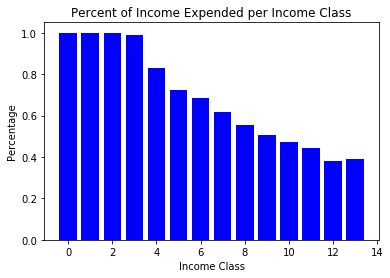

In [23]:
plt.bar(cleanPercentages1.index, cleanPercentages1.ExpInc, color = 'b')
plt.title("Percent of Income Expended per Income Class")
plt.xlabel("Income Class")
plt.ylabel("Percentage")
plt.show()

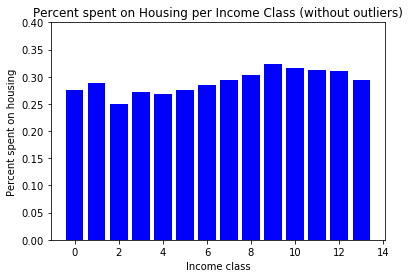

In [24]:
plt.bar(cleanPercentages1.index, cleanPercentages1.iHousing, color = 'b')
plt.ylim(0,.4)
plt.title("Percent spent on Housing per Income Class (without outliers)")
plt.xlabel("Income class")
plt.ylabel("Percent spent on housing")
plt.show()

### Cell that determines how similar the neighbor rows are
Potentially use this to combine similar rows.
Can't figure out the correct statistical test to determine if rows are statistically similar

###### The higher the difference value the more different the rows are. (low values mean similar rows)

In [25]:
significance = 0.005
for row in range(len(cleanPercentages1)-1):
    print("Income Bracket Range 1: $"+str(incomeBrackets[row])+" - "+"$"+str(incomeBrackets[row+1]))
    print("Income Bracket Range 2: $"+str(incomeBrackets[row+1])+" - "+"$"+str(incomeBrackets[row+2]))
    print("Number of CUs in Income Bracket 1: "+str(inclassExpenses.INCLASS.value_counts().values[row]))
    print("Number of CUs in Income Bracket 2: "+str(inclassExpenses.INCLASS.value_counts().values[row+1]))
    print("Rows in Percentage Dataframe: Row "+str(row)+" and Row "+str(row+1))
    difference = 0
    for column in range(len(cleanPercentages1.columns)):
        difference += (cleanPercentages1.loc[column].mean() * abs(cleanPercentages1.ix[row,column] - cleanPercentages1.ix[row+1,column]))
        if abs(cleanPercentages1.ix[row,column] - cleanPercentages1.ix[row+1,column]) < significance:
            print("Column: "+str(cleanPercentages1.columns[column]))
    print("The difference value is: "+str(round(difference*1000,2)))
    print()

Income Bracket Range 1: $-inf - $11000
Income Bracket Range 2: $11000 - $20000
Number of CUs in Income Bracket 1: 498
Number of CUs in Income Bracket 2: 448
Rows in Percentage Dataframe: Row 0 and Row 1
Column: iClothingAndBeauty
Column: iEntertainment
Column: iInsurance
Column: iHousingPrinciple
Column: ExpInc
The difference value is: 13.86

Income Bracket Range 1: $11000 - $20000
Income Bracket Range 2: $20000 - $30000
Number of CUs in Income Bracket 1: 448
Number of CUs in Income Bracket 2: 436
Rows in Percentage Dataframe: Row 1 and Row 2
Column: iFoodAtHome
Column: iFoodAway
Column: iClothingAndBeauty
Column: iInsurance
Column: iHousingPrinciple
Column: ExpInc
The difference value is: 19.1

Income Bracket Range 1: $20000 - $30000
Income Bracket Range 2: $30000 - $43000
Number of CUs in Income Bracket 1: 436
Number of CUs in Income Bracket 2: 419
Rows in Percentage Dataframe: Row 2 and Row 3
Column: iFoodAway
Column: iHealthcare
Column: iEntertainment
Column: iMiscellaneous
Column:

In [26]:
significance = 0.005
for row in range(len(cleanPercentages2)-1):
    print("Income Bracket Range 1: $"+str(incomeBrackets[row])+" - "+"$"+str(incomeBrackets[row+1]))
    print("Income Bracket Range 2: $"+str(incomeBrackets[row+1])+" - "+"$"+str(incomeBrackets[row+2]))
    print("Number of CUs in Income Bracket 1: "+str(inclassExpenses.INCLASS.value_counts().values[row]))
    print("Number of CUs in Income Bracket 2: "+str(inclassExpenses.INCLASS.value_counts().values[row+1]))
    print("Rows in Percentage Dataframe: Row "+str(row)+" and Row "+str(row+1))
    difference = 0
    for column in range(len(cleanPercentages2.columns)):
        difference += (cleanPercentages2.loc[column].mean() * abs(cleanPercentages2.ix[row,column] - cleanPercentages2.ix[row+1,column]))
        if abs(cleanPercentages2.ix[row,column] - cleanPercentages2.ix[row+1,column]) < significance:
            print("Column: "+str(cleanPercentages2.columns[column]))
    print("The difference value is: "+str(round(difference*1000,2)))
    print()

Income Bracket Range 1: $-inf - $11000
Income Bracket Range 2: $11000 - $20000
Number of CUs in Income Bracket 1: 498
Number of CUs in Income Bracket 2: 448
Rows in Percentage Dataframe: Row 0 and Row 1
Column: iClothingAndBeauty
Column: iEntertainment
Column: iInsurance
Column: iHousingPrinciple
Column: ExpInc
The difference value is: 13.86

Income Bracket Range 1: $11000 - $20000
Income Bracket Range 2: $20000 - $30000
Number of CUs in Income Bracket 1: 448
Number of CUs in Income Bracket 2: 436
Rows in Percentage Dataframe: Row 1 and Row 2
Column: iFoodAtHome
Column: iFoodAway
Column: iClothingAndBeauty
Column: iInsurance
Column: iHousingPrinciple
Column: ExpInc
The difference value is: 19.1

Income Bracket Range 1: $20000 - $30000
Income Bracket Range 2: $30000 - $43000
Number of CUs in Income Bracket 1: 436
Number of CUs in Income Bracket 2: 419
Rows in Percentage Dataframe: Row 2 and Row 3
Column: iFoodAway
Column: iHealthcare
Column: iEntertainment
Column: iMiscellaneous
Column:

Creating the aggregate percentage.

# Plots

In [27]:
# ploting the number of people in each bracket
print(inclassExpenses.INCLASS.value_counts().values)
plt.bar(list(inclassExpenses.INCLASS.value_counts().index.tolist()), inclassExpenses.INCLASS.value_counts().values, align='center', color = "r")
plt.title("Number of CUs in Income classes (with outliers)")
plt.xlabel("Income Class")
plt.ylabel("Count")
# plt.show()

[498 448 436 419 392 346 314 304 300 285 256 204 124  87]


In [28]:
# creating the plot of percent of income expended per income class
plt.bar(percentages.index, percentages.ExpInc, color = 'r')
plt.title("Percent of Income Expended per Income Class (with outliers)")
plt.xlabel("Income Class")
plt.ylabel("Percentage")
# plt.show()

In [29]:
# creating plot of Percent spent on Housing per income class
plt.bar(percentages.index, percentages.iHousing, color = 'r')
plt.ylim(0,.4)
plt.title("Percent spent on Housing per Income Class (with outliers)")
plt.xlabel("Income class")
plt.ylabel("Percent spent on housing")
# plt.show()

In [30]:
inclassSD = inclassExpenses.groupby(['INCLASS'],as_index=False).std()
inclassSD.iHousing
plt.bar(inclassSD.iHousing.index, inclassSD.iHousing, color = 'r')
plt.title("Standard deviations in Income Classes (with outliers)")
plt.ylim(0,60000)
plt.xlabel("Income Class")
plt.ylabel("Standard Deviation")
# plt.show()

In [31]:
# ploting the number of people in each bracket
print(clean1.INCLASS.value_counts().values)
plt.bar(list(clean1.INCLASS.value_counts().index.tolist()), clean1.INCLASS.value_counts().values, align='center', color="g")
plt.title("Number of CUs in Income classes (outer fence)")
plt.xlabel("Income Class")
plt.ylabel("Count")
# plt.show()

[482 425 414 406 368 336 293 292 291 265 244 197 119  84]


In [32]:
inclassClean1SD = clean1.groupby(['INCLASS'],as_index=False).std()
inclassClean1SD.iHousing
plt.bar(inclassClean1SD.iHousing.index, inclassClean1SD.iHousing,color = 'g')
plt.ylim(0,60000)
plt.title("Standard deviations in Income Classes (inner fence)")
plt.xlabel("Income Class")
plt.ylabel("Standard Deviation")
# plt.show()

In [33]:
# ploting the number of people in each bracket
print(clean2.INCLASS.value_counts().values)
plt.bar(list(clean2.INCLASS.value_counts().index.tolist()), clean2.INCLASS.value_counts().values, align='center', color="b")
plt.title("Number of CUs in Income classes (outer fence)")
plt.xlabel("Income Class")
plt.ylabel("Count")
# plt.show()

[492 442 432 417 382 342 306 298 297 279 255 202 123  86]


In [34]:
inclassClean2SD = clean2.groupby(['INCLASS'],as_index=False).std()
inclassClean2SD.iHousing
plt.bar(inclassClean2SD.iHousing.index, inclassClean2SD.iHousing,color = 'b')
plt.ylim(0,60000)
plt.title("Standard deviations in Income Classes (outer fence)")
plt.xlabel("Income Class")
plt.ylabel("Standard Deviation")
# plt.show()

The average percent change between with and without outliers: 1407.14%


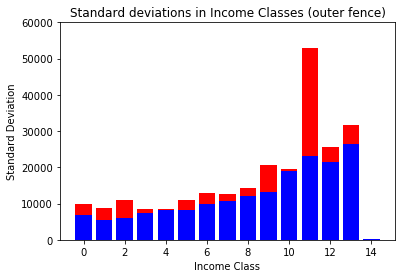

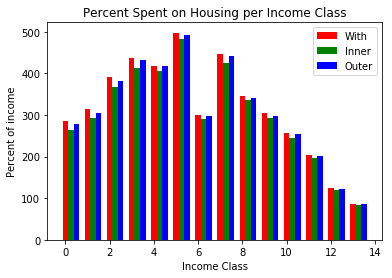

In [35]:
n_groups = 4
values1 = inclassExpenses.INCLASS.value_counts().values
values2 = clean1.INCLASS.value_counts().values
values3 = clean2.INCLASS.value_counts().values

print("The average percent change between with and without outliers: "+str(round((values1-values2).mean()*100,2))+"%")

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 1
 
rects1 = plt.bar(inclassExpenses.INCLASS.value_counts().index -1, values1, bar_width,
                 alpha=opacity,
                 color='r',
                 label='With')
 
rects2 = plt.bar(clean1.INCLASS.value_counts().index -1 + bar_width, values2, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Inner')

rects3 = plt.bar(clean2.INCLASS.value_counts().index - 1 + bar_width*2, values3, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Outer')

plt.xlabel('Income Class')
plt.ylabel('Percent of income')
plt.title('Percent Spent on Housing per Income Class')
plt.legend()
plt.show()

The average percent change between with and without outliers: 1.25%


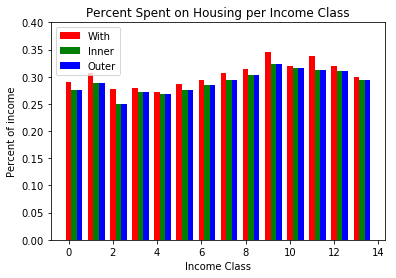

In [36]:
n_groups = 4
values1 = percentages.iHousing
values2 = cleanPercentages1.iHousing
values3 = cleanPercentages2.iHousing

print("The average percent change between with and without outliers: "+str(round((values1-values2).mean()*100,2))+"%")

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 1
 
rects1 = plt.bar(percentages.index, values1, bar_width,
                 alpha=opacity,
                 color='r',
                 label='With')
 
rects2 = plt.bar(cleanPercentages1.index + bar_width, values2, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Inner')

rects3 = plt.bar(cleanPercentages2.index + bar_width*2, values3, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Outer')

plt.xlabel('Income Class')
plt.ylabel('Percent of income')
plt.title('Percent Spent on Housing per Income Class')
plt.ylim(0,.4)
plt.legend()
plt.show()

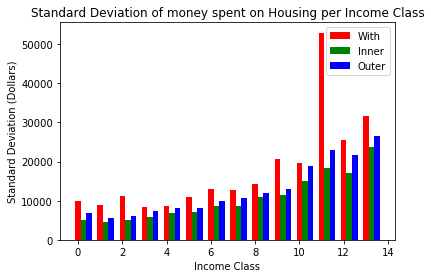

In [37]:
n_groups = 4
values1 = inclassSD.iHousing
values2 = inclassClean1SD.iHousing
values3 = inclassClean2SD.iHousing

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 1
 
rects1 = plt.bar(percentages.index, values1, bar_width,
                 alpha=opacity,
                 color='r',
                 label='With')
 
rects2 = plt.bar(cleanPercentages1.index + bar_width, values2, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Inner')

rects3 = plt.bar(cleanPercentages2.index + bar_width*2, values3, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Outer')

plt.xlabel('Income Class')
plt.ylabel('Standard Deviation (Dollars)')
plt.title('Standard Deviation of money spent on Housing per Income Class')
plt.legend()
plt.show()

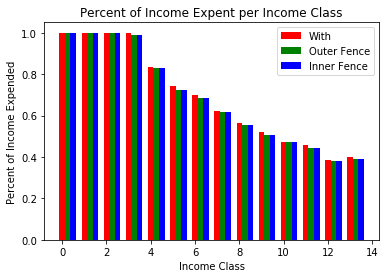

In [38]:
n_groups = 3
values1 = percentages.ExpInc
values2 = cleanPercentages1.ExpInc
values3 = cleanPercentages2.ExpInc

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 1
 
rects1 = plt.bar(percentages.index, values1, bar_width,
                 alpha=opacity,
                 color='r',
                 label='With')
 
rects2 = plt.bar(cleanPercentages1.index + bar_width, values2, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Outer Fence')

rects3 = plt.bar(cleanPercentages2.index + bar_width*2, values3, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Inner Fence')
 
plt.xlabel('Income Class')
plt.ylabel('Percent of Income Expended')
plt.title('Percent of Income Expent per Income Class')
plt.legend()
plt.show()

80.9555741827


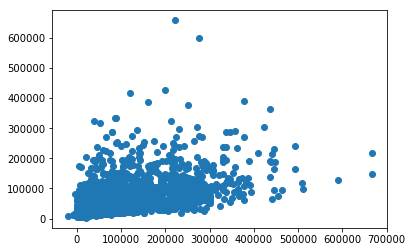

In [39]:
notMissingIncome = clean2[(clean2.iTotalExp/clean2.FINCBTXM) < 100]
print((notMissingIncome.iTotalExp/notMissingIncome.FINCBTXM).max())
plt.scatter(notMissingIncome.FINCBTXM, notMissingIncome.iTotalExp)
plt.show()

# Least squares polynomial fit

In [45]:
def getAggregatePercentage(grossIncome):
    coefficients = np.polyfit(clean2.FINCBTXM, clean2.iTotalExp, deg = 3)
    p = np.poly1d(coefficients)
    exp = p(grossIncome)
    if exp/grossIncome < 1:
        percent = exp/income
    else:
        percent = 1
    return(percent)

income = 80000
getAggregatePercentage(income)

0.6369731877192828